In [2]:
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all = True)
print("全模式：" + "/".join(seg_list)) #全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all = False)
print("精确模式：" + "/".join(seg_list)) #精确模式

seg_list = jieba.cut("他来到了网易杭研大厦") #默认是精确模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\George\AppData\Local\Temp\jieba.cache
Loading model cost 2.299 seconds.
Prefix dict has been built successfully.


全模式：我/来到/北京/清华/清华大学/华大/大学
精确模式：我/来到/北京/清华大学
他, 来到, 了, 网易, 杭研, 大厦


### 添加自定义词典

In [3]:
text = '故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等'

#全模式
seg_list = jieba.cut(text, cut_all = True)
print("全模式：" + "/".join(seg_list)) #全模式

#精确模式
seg_list = jieba.cut(text, cut_all = False)
print("精确模式：" + "/".join(seg_list))

全模式：故宫/的/著名/著名景点/景点/包括/乾/清宫/、/太和/太和殿/和/黄/琉璃/琉璃瓦/等
精确模式：故宫/的/著名景点/包括/乾/清宫/、/太和殿/和/黄/琉璃瓦/等


In [4]:
jieba.load_userdict("./data/mydict.txt") #需UTF-8，可以在另存为里面设置

#也可以用jieba.add_word("乾清宫")

text = "故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"

# 全模式
seg_list = jieba.cut(text, cut_all=True)
print(u"[全模式]: ", "/ ".join(seg_list))

# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print(u"[精确模式]: ", "/ ".join(seg_list))

[全模式]:  故宫/ 的/ 著名/ 著名景点/ 景点/ 包括/ 乾清宫/ 清宫/ 、/ 太和/ 太和殿/ 和/ 黄琉璃瓦/ 琉璃/ 琉璃瓦/ 等
[精确模式]:  故宫/ 的/ 著名景点/ 包括/ 乾清宫/ 、/ 太和殿/ 和/ 黄琉璃瓦/ 等


### 关键词抽取

In [6]:
import jieba.analyse

seg_list = jieba.cut(text, cut_all = False)
print(u"分词结果：")
print("/".join(seg_list))

tags = jieba.analyse.extract_tags(text, topK=5)
print(u"关键词：")
print(" ".join(tags))

分词结果：
故宫/的/著名景点/包括/乾清宫/、/太和殿/和/黄琉璃瓦/等
关键词：
著名景点 乾清宫 黄琉璃瓦 太和殿 故宫


In [7]:
tags = jieba.analyse.extract_tags(text, topK=5, withWeight=True)
for word, weight in tags:
    print(word, weight)

著名景点 2.3167796086666668
乾清宫 1.9924612504833332
黄琉璃瓦 1.9924612504833332
太和殿 1.6938346722833335
故宫 1.5411195503033335


#### 词性标注

In [8]:
import jieba.posseg as pseg
 
words = pseg.cut("我爱北京天安门")
for word, flag in words:
    print("%s %s" % (word, flag))

我 r
爱 v
北京 ns
天安门 ns


### 词云展示

{'习近平': 3, '代表': 5, '第十八届': 3, '中央委员会': 3, '十九': 2, '大作': 1, '报告': 5, '新华社': 1, '北京': 3, '10': 2, '18': 2, '日电': 1, '同志': 18, '中国共产党': 19, '第十九次': 3, '全国代表大会': 3, '以下': 3, '全文': 1, '2017': 1, '现在': 2, '大会': 3, '全面': 88, '建成': 22, '小康社会': 16, '决胜': 7, '阶段': 9, '中国': 168, '特色': 79, '社会主义': 146, '进入': 10, '时代': 63, '关键时期': 1, '召开': 3, '一次': 1, '十分': 3, '重要': 18, '主题': 7, '不忘': 3, '初心': 6, '牢记': 4, '使命': 9, '高举': 4, '伟大旗帜': 3, '夺取': 8, '伟大胜利': 4, '实现': 83, '中华民族': 43, '伟大': 58, '复兴': 32, '不懈': 4, '奋斗': 18, '方得': 1, '始终': 16, '就是': 6, '人民': 157, '幸福': 5, '这个': 9, '激励': 7, '不断前进': 1, '根本': 16, '动力': 6, '全党同志': 4, '一定': 9, '永远': 6, '同呼吸': 1, '共命运': 1, '心连心': 1, '美好生活': 14, '向往': 3, '作为': 12, '奋斗目标': 8, '永不': 3, '懈怠': 4, '精神状态': 1, '一往无前': 1, '姿态': 3, '继续': 10, '朝着': 3, '宏伟目标': 1, '奋勇前进': 3, '当前': 2, '国内外': 3, '形势': 4, '正在': 3, '发生': 4, '深刻': 11, '复杂': 7, '变化': 11, '我国': 50, '发展': 212, '处于': 4, '战略': 36, '机遇期': 1, '前景': 3, '光明': 3, '挑战': 7, '严峻': 2, '登高望远': 1, '居安思危': 2, '勇于': 11, '变革': 11, '勇

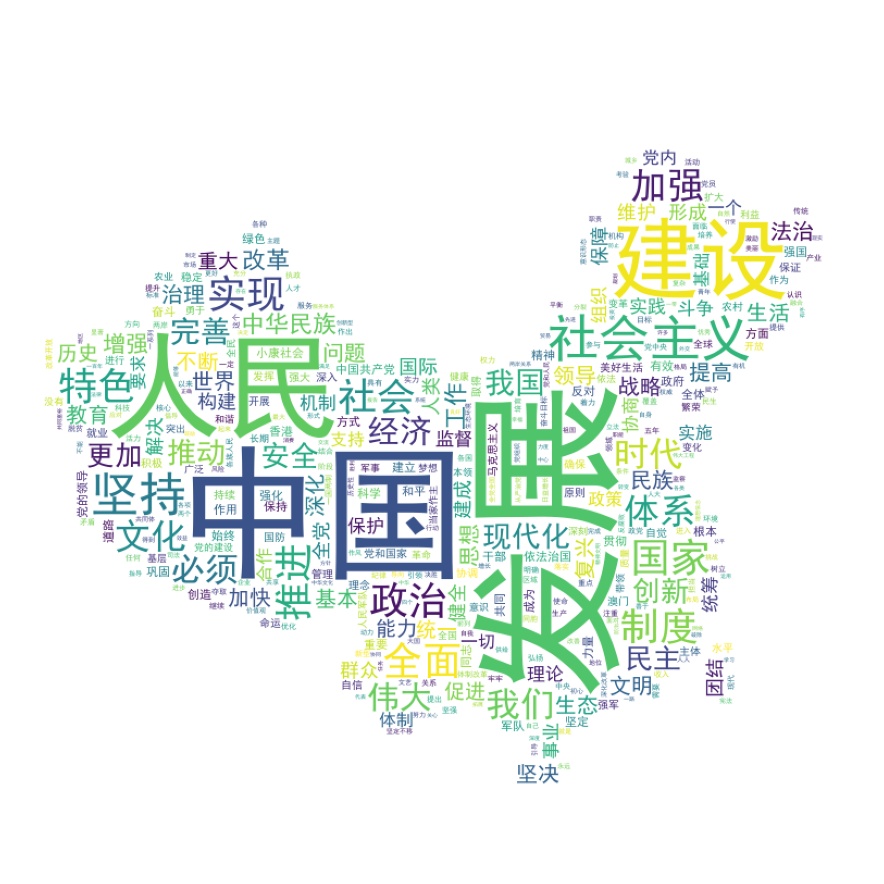

In [14]:
import jieba
from wordcloud import WordCloud
from matplotlib.pyplot import imread
from collections import Counter
import matplotlib.pyplot as plt

data = {}

text_file = open('./data/19Congress.txt','r',encoding='utf-8')
text = text_file.read()
with open('./data/stopwords.txt',encoding='utf-8') as file:
    stopwords = {line.strip() for line in file}
    
seg_list = jieba.cut(text, cut_all=False)
for word in seg_list:
    if len(word)>=2:
        if not data.__contains__(word):
            data[word] = 0
        data[word] += 1
print(data)


my_wordcloud = WordCloud(
    background_color = 'white', #设置背景颜色
    max_words = 400, #设置最大实现的字数
    font_path = r"./data/SimHei.ttf",  #设置字体格式，如不设置显示不了中文 
    mask = imread('./data/mapofChina.jpg'), #指定在什么图片上画
    width=1000,
    height=1000,
    stopwords = stopwords
).generate_from_frequencies(data)

plt.figure(figsize=(18,16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()  # 展示词云
my_wordcloud.to_file('result.jpg')
text_file.close()